In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import single_graph_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [6]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 20
NODE_HIDDEN_SIZE = 50
EPOCHS = 50
DROP_OUT = 0.1
BOND_ATTR = 5

Run 1
Epoch: 050, Train Loss: 0.4500, Test Loss: 0.4727, Train MAE: 0.0418, Test MAE: 0.0505, , Train R2: 0.8611, Test R2: 0.8343
Run 2
Epoch: 050, Train Loss: 0.4480, Test Loss: 0.4695, Train MAE: 0.0355, Test MAE: 0.0430, , Train R2: 0.8993, Test R2: 0.8832
Run 3
Epoch: 050, Train Loss: 0.4478, Test Loss: 0.4683, Train MAE: 0.0353, Test MAE: 0.0410, , Train R2: 0.8945, Test R2: 0.8859
Run 4
Epoch: 050, Train Loss: 0.4479, Test Loss: 0.4694, Train MAE: 0.0356, Test MAE: 0.0457, , Train R2: 0.8839, Test R2: 0.8629
Run 5
Epoch: 050, Train Loss: 0.4489, Test Loss: 0.4711, Train MAE: 0.0371, Test MAE: 0.0462, , Train R2: 0.8919, Test R2: 0.8651
0.0344045840203762 0.04241154864430428 0.8984563607029532 0.8751033387791406


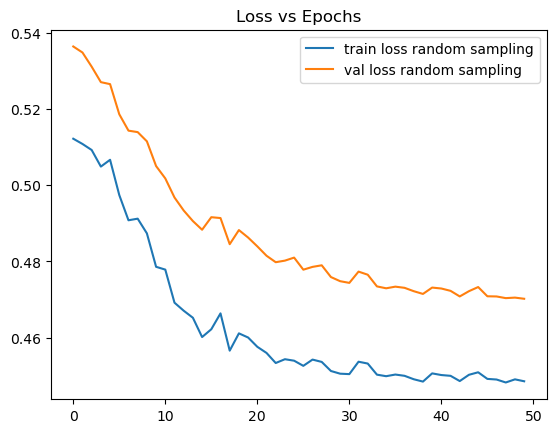

In [8]:
import numpy as np

train_loss = 0
test_loss = 0
train_R2 = 0
train_MAE = 0
test_MAE = 0
test_R2 = 0

NUM_RUN = 5
a = ASODataset(single_graph_batch)

for i in range(NUM_RUN):
    print("Run " + str(i + 1))

    train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
    train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

    device = torch.device('cuda')
    model = GNNModel_sg_edge_attr(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, BOND_ATTR, num_layers=3, dp_rate=DROP_OUT)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = ExponentialLR(optimizer, gamma=0.95)

    t = Trainer(model, device, optimizer, scheduler, glob_v= False)
    results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS, silent = True)
    
    train_loss += np.array(t.log["train_loss"])
    test_loss += np.array(t.log["val_loss"])

    train_MAE += results[1]
    train_R2 += results[2]
    test_MAE += results[4]
    test_R2 += results[5]

train_loss /= NUM_RUN
test_loss /= NUM_RUN
train_MAE /= NUM_RUN
test_MAE /= NUM_RUN
train_R2 /= NUM_RUN
test_R2 /= NUM_RUN

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Loss vs Epochs")
plt.plot(train_loss, label="train loss random sampling")
plt.plot(test_loss, label = "val loss random sampling")
plt.legend()

rs_train = train_loss
rs_test = test_loss

print(train_MAE, test_MAE, train_R2, test_R2)

Run 1
Epoch: 050, Train Loss: 0.4406, Test Loss: 0.5171, Train MAE: 0.0398, Test MAE: 0.0784, , Train R2: 0.8807, Test R2: 0.3861
Run 2
Epoch: 050, Train Loss: 0.4355, Test Loss: 0.5009, Train MAE: 0.0309, Test MAE: 0.0514, , Train R2: 0.9065, Test R2: 0.8285
Run 3
Epoch: 050, Train Loss: 0.4529, Test Loss: 0.4741, Train MAE: 0.0498, Test MAE: 0.0715, , Train R2: 0.8544, Test R2: 0.5785
Run 4
Epoch: 050, Train Loss: 0.4517, Test Loss: 0.4666, Train MAE: 0.0366, Test MAE: 0.0687, , Train R2: 0.8850, Test R2: 0.7479
Run 5
Epoch: 050, Train Loss: 0.4307, Test Loss: 0.5239, Train MAE: 0.0320, Test MAE: 0.0711, , Train R2: 0.9048, Test R2: 0.6606
0.03483363725244999 0.05949410498142242 0.8982005019435814 0.7361982162416922


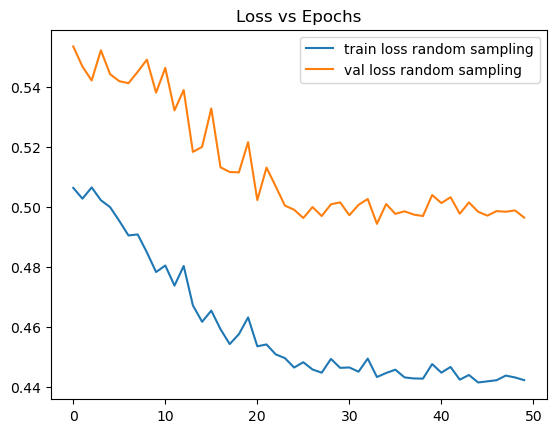

In [10]:
import numpy as np

train_loss = 0
test_loss = 0
train_R2 = 0
train_MAE = 0
test_MAE = 0
test_R2 = 0

NUM_RUN = 5
a = ASODataset(single_graph_batch)

for i in range(NUM_RUN):
    print("Run " + str(i + 1))

    train_data, val_data = a.sample_test_data_catalyst_only(10, 2, 2)
    train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

    device = torch.device('cuda')
    model = GNNModel_sg_edge_attr(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, BOND_ATTR, num_layers=3, dp_rate=DROP_OUT)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = ExponentialLR(optimizer, gamma=0.95)

    t = Trainer(model, device, optimizer, scheduler, glob_v= False)
    results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS, silent = True)
    
    train_loss += np.array(t.log["train_loss"])
    test_loss += np.array(t.log["val_loss"])

    train_MAE += results[1]
    train_R2 += results[2]
    test_MAE += results[4]
    test_R2 += results[5]

train_loss /= NUM_RUN
test_loss /= NUM_RUN
train_MAE /= NUM_RUN
test_MAE /= NUM_RUN
train_R2 /= NUM_RUN
test_R2 /= NUM_RUN

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Loss vs Epochs")
plt.plot(train_loss, label="train loss random sampling")
plt.plot(test_loss, label = "val loss random sampling")
plt.legend()

mc_train = train_loss
mc_test = test_loss

print(train_MAE, test_MAE, train_R2, test_R2)

Run 1
Epoch: 050, Train Loss: 0.5101, Test Loss: 0.3810, Train MAE: 0.0615, Test MAE: 0.0631, , Train R2: 0.7289, Test R2: 0.6828
Run 2
Epoch: 050, Train Loss: 0.4461, Test Loss: 0.4813, Train MAE: 0.0470, Test MAE: 0.0733, , Train R2: 0.8390, Test R2: 0.6212
Run 3
Epoch: 050, Train Loss: 0.4502, Test Loss: 0.4654, Train MAE: 0.0516, Test MAE: 0.0576, , Train R2: 0.8043, Test R2: 0.7220
Run 4
Epoch: 050, Train Loss: 0.4431, Test Loss: 0.4902, Train MAE: 0.0485, Test MAE: 0.0797, , Train R2: 0.8180, Test R2: 0.5147
Run 5
Epoch: 050, Train Loss: 0.5118, Test Loss: 0.3949, Train MAE: 0.0561, Test MAE: 0.0577, , Train R2: 0.7933, Test R2: 0.7251
0.05194426625967026 0.0572311632335186 0.8050525961909148 0.7294921485283098


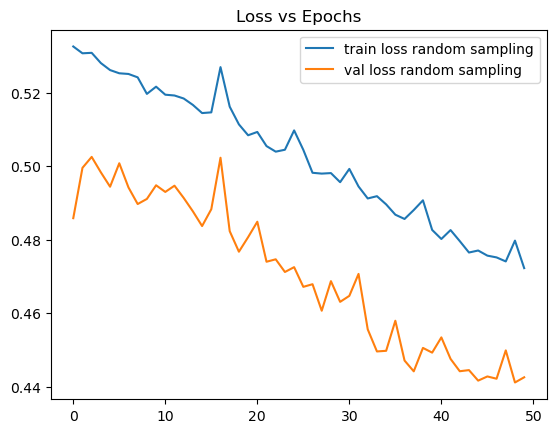

In [11]:
import numpy as np

train_loss = 0
test_loss = 0
train_R2 = 0
train_MAE = 0
test_MAE = 0
test_R2 = 0

NUM_RUN = 5
a = ASODataset(single_graph_batch)

for i in range(NUM_RUN):
    print("Run " + str(i + 1))

    train_data, val_data = a.sample_test_data_reactant_only(10, 2, 2)
    train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
    val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

    device = torch.device('cuda')
    model = GNNModel_sg_edge_attr(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, BOND_ATTR, num_layers=3, dp_rate=DROP_OUT)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = ExponentialLR(optimizer, gamma=0.95)

    t = Trainer(model, device, optimizer, scheduler, glob_v= False)
    results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS, silent = True)
    
    train_loss += np.array(t.log["train_loss"])
    test_loss += np.array(t.log["val_loss"])

    train_MAE += results[1]
    train_R2 += results[2]
    test_MAE += results[4]
    test_R2 += results[5]

train_loss /= NUM_RUN
test_loss /= NUM_RUN
train_MAE /= NUM_RUN
test_MAE /= NUM_RUN
train_R2 /= NUM_RUN
test_R2 /= NUM_RUN

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Loss vs Epochs")
plt.plot(train_loss, label="train loss random sampling")
plt.plot(test_loss, label = "val loss random sampling")
plt.legend()

mr_train = train_loss
mr_test = test_loss

print(train_MAE, test_MAE, train_R2, test_R2)

In [13]:
mc_test.tofile('sge_mc_test.csv', sep=',')
mr_test.tofile('sge_mr_test.csv', sep=',')

rs_train.tofile('sge_rs_train.csv', sep=',')
rs_test.tofile('sge_rs_test.csv', sep=',')